In [1]:
%matplotlib ipympl
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print( 'ipywidgets version: ', widgets.__version__ )

ipywidgets version:  8.0.4


In [3]:
# define space invader
space_invader = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # row_00
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # row_01
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # row_02
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # row_03
                          [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # row_04
                          [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # row_05
                          [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # row_06
                          [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0],  # row_07
                          [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],  # row_08
                          [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0],  # row_09
                          [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],  # row_10
                          [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],  # row_11
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # row_12
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # row_13
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # row_14
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]) # row_15

Nx, Ny = space_invader.shape[0], space_invader.shape[1]

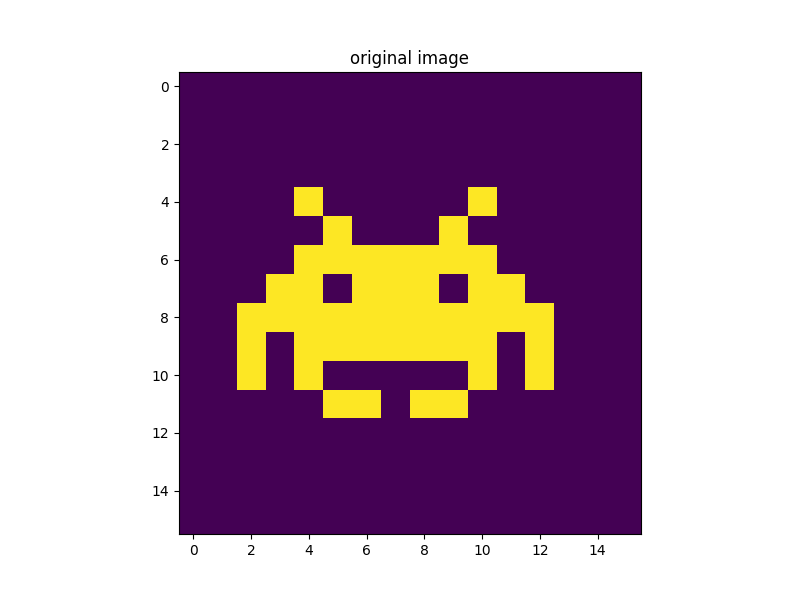

In [4]:
# plot the original (non-rotated) image
fig1 = plt.figure( figsize=(8,6) )   # (width, height) in inches
ax1_1= fig1.add_subplot( 1,1,1 )      # rows, cols, plotnumber

img  = ax1_1.imshow(space_invader)
ax1_1.set_title ('original image')
plt.show()

In [5]:
def rotate_via_rotMatrix(coords_in, angle_in_degree, rot_axis='z', rot_center=np.array([0,0])):
    alpha = np.radians(angle_in_degree)
    """
    Rotate coordinate vector using the rotation matrix.
    """
    
    # transform coordinate system such that rotation center is origin
    coords_in[0] -= rot_center[0]
    coords_in[1] -= rot_center[1]
    
    # define rotation matrix
    if rot_axis == 'z':
        rot_matrix = np.matrix([[np.cos(alpha), -np.sin(alpha)],
                                [np.sin(alpha), np.cos(alpha) ]])
        
    coords_new = rot_matrix * np.array([[coords_in[0]],
                                        [coords_in[1]]])
    
    # transform coordinate system back to original system
    coords_new = np.array( [round(coords_new[0,0] + rot_center[0]), 
                            round(coords_new[1,0] + rot_center[1])] )
    
    return coords_new

In [6]:
def rotate_via_shearing(coords_in, angle_in_degree, rot_axis='z', rot_center=np.array([0,0])):
    """
    Rotate coordinate vector using the shearing method.
    """
    
    alpha = np.radians(angle_in_degree)
    
    # transform coordinate system such that rotation center is origin
    coords_in[0] -= rot_center[0]
    coords_in[1] -= rot_center[1]
    
    # translations
    shear_1 = np.tan(alpha/2.)
    shear_2 = -np.sin(alpha)
    shear_3 = np.tan(alpha/2.)
    
    if rot_axis =='z':
        y_new = coords_in[1] + round(shear_1*coords_in[0])
        x_new = coords_in[0] + round(shear_2*y_new)
        y_new = y_new + round(shear_3*x_new)
        
    # transform coordinate system back to original system
    coords_new = np.array( [[x_new + rot_center[0]], [y_new + rot_center[1]]] )
        
    return coords_new

In [7]:
def check_boundaries(coords_new, coords_min, coords_max):
    """
    Check if the new (rotated) coordinate vector is still within the grid boundaries.
    """
    # check x boundaries
    if coords_new[0] < coords_min[0]: return False
    elif coords_new[0] >= coords_max[0]: return False
    # check y boundaries
    if coords_new[1] < coords_min[1]: return False
    elif coords_new[1] >= coords_max[1]: return False

    return True

In [8]:
def rotate_arr_via_rotMatrix( arr_in, angle_in_degrees,
                              rot_axis='z', rot_center=np.array([0,0])):
    """
    Rotate full array using the rotation matrix.
    """

    Ny, Ny = arr_in.shape[0], arr_in.shape[1]
    
    arr_rotated = np.zeros( (Nx,Ny) )

    for xx in range(Nx):
        for yy in range(Ny):
            if arr_in[xx,yy] > 0:
                # rotate via rotation matrix
                coords_new = rotate_via_rotMatrix( np.array([xx,yy]), angle_in_degrees, 
                                                   rot_axis='z', 
                                                   rot_center=rot_center )
                if check_boundaries(coords_new, np.array([0,0]), np.array([Nx, Ny])):
                    arr_rotated[ coords_new[0], coords_new[1] ] = 1
                
    return arr_rotated

In [9]:
def rotate_arr_via_shearing( arr_in, angle_in_degrees, 
                             rot_axis='z', rot_center=np.array([0,0]) ):
    """
    Rotate full array using the shearing method.
    """
    
    Ny, Ny = arr_in.shape[0], arr_in.shape[1]
        
    arr_rotated = np.zeros( (Nx,Ny) )

    for xx in range(Nx):
        for yy in range(Ny):
            if arr_in[xx,yy] > 0:
                # rotate via rotation matrix
                coords_new = rotate_via_shearing( np.array([xx,yy]), angle_in_degrees, 
                                                  rot_axis='z', 
                                                  rot_center=rot_center )
                if check_boundaries(coords_new, np.array([0,0]), np.array([Nx, Ny])):
                    arr_rotated[ coords_new[0], coords_new[1] ] = 1
                
    return arr_rotated

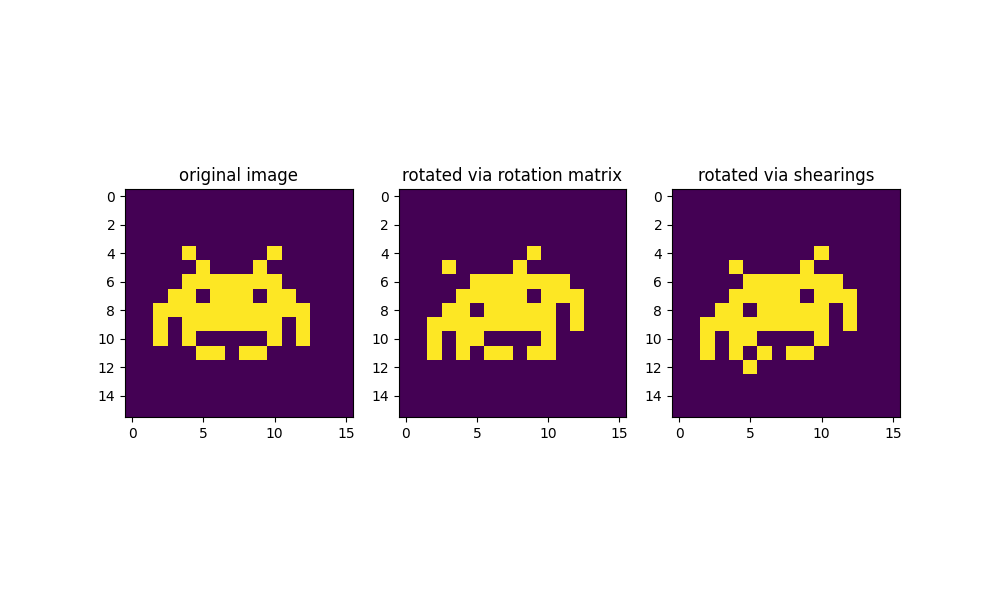

In [14]:
angle_in_degrees = 10
rot_center = np.array( [round(Nx/2), round(Ny/2)] )

space_invader_rotated1 = rotate_arr_via_rotMatrix( space_invader, angle_in_degrees, rot_center=rot_center )
space_invader_rotated2 = rotate_arr_via_shearing( space_invader, angle_in_degrees, rot_center=rot_center )

fig2 = plt.figure( figsize=(10,6) )   # (width, height) in inches

# original image
ax2_1 = fig2.add_subplot( 1,3,1 )      # rows, cols, plotnumber
img_original = ax2_1.imshow(space_invader)
ax2_1.set_title ('original image')

# rotated via rotation matrix
ax2_2  = fig2.add_subplot( 1,3,2 )      # rows, cols, plotnumber
img_rotated_shear = ax2_2.imshow(space_invader_rotated1)
ax2_2.set_title ('rotated via rotation matrix')

# rotated via rotation matrix
ax2_3  = fig2.add_subplot( 1,3,3 )      # rows, cols, plotnumber
img_rotated_shear = ax2_3.imshow(space_invader_rotated2)
ax2_3.set_title ('rotated via shearings')

plt.show()

In [15]:
def plot_image(ax, arr_in, angle_in_degrees=0, rot='shear', rot_center=np.array([0,0])):
    if rot == 'shear':
        img_rot = rotate_arr_via_shearing( arr_in, angle_in_degrees, rot_center=rot_center )
    elif rot == 'matrix':
        img_rot = rotate_arr_via_rotMatrix( arr_in, angle_in_degrees, rot_center=rot_center )
    img = ax.imshow(img_rot)

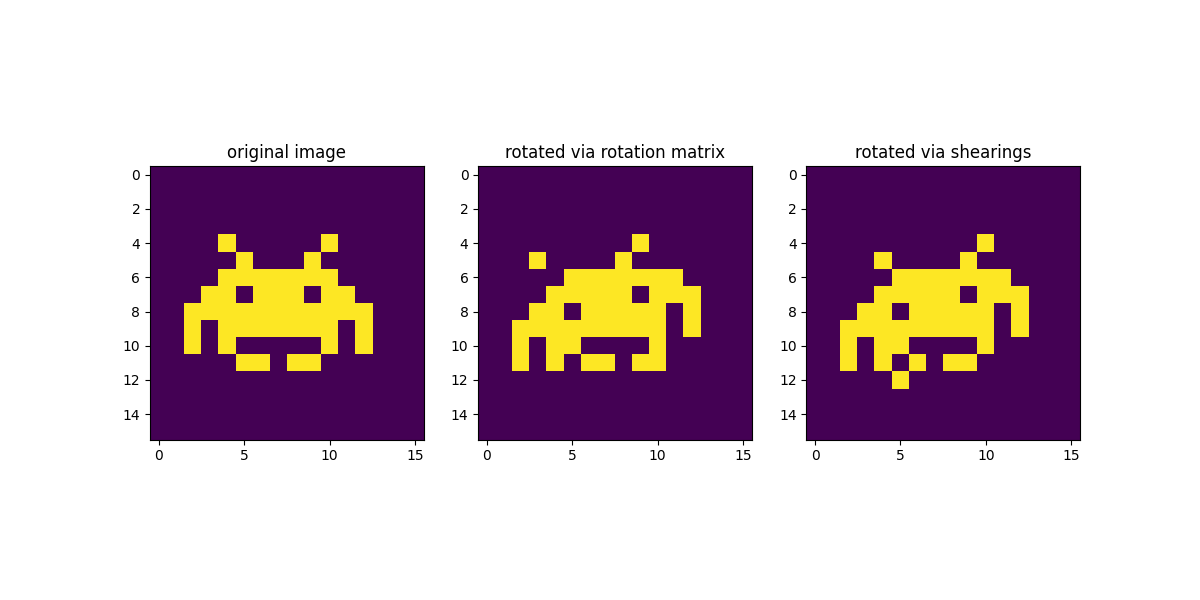

IntSlider(value=0, max=90)

In [16]:
angle_in_degrees = 10
rot_center = np.array( [round(Nx/2), round(Ny/2)] )

fig3 = plt.figure( figsize=(12,6) )   # (width, height) in inches

# original image
ax3_1 = fig3.add_subplot( 1,3,1 )      # rows, cols, plotnumber
# rotated via rotation matrix
ax3_2 = fig3.add_subplot( 1,3,2 )      # rows, cols, plotnumber
# rotated via rotation matrix
ax3_3 = fig3.add_subplot( 1,3,3 )      # rows, cols, plotnumber

img_original = ax3_1.imshow(space_invader)
ax3_1.set_title ('original image')

plot_image(ax3_2, space_invader, angle_in_degrees=angle_in_degrees, rot='matrix', rot_center=rot_center)
ax3_2.set_title ('rotated via rotation matrix')

plot_image(ax3_3, space_invader, angle_in_degrees=angle_in_degrees, rot='shear', rot_center=rot_center)
ax3_3.set_title ('rotated via shearings')

plt.show()

slider_angle = widgets.IntSlider(value=0, min=0, max=90, step=1)

# callback function for the slider widget
def handle_slider_change(change):
    # update rotation via matrix 
    plot_image(ax3_2, space_invader, angle_in_degrees=change.new, rot='matrix', rot_center=rot_center)
    # update rotation via shear
    plot_image(ax3_3, space_invader, angle_in_degrees=change.new, rot='shear', rot_center=rot_center)
    fig3.canvas.draw()

# connect handle_slider_change function to slider widget using the .observe() method, observing changes in value attribute
slider_angle.observe(handle_slider_change, 'value')
slider_angle